## Example for Feature Importance (Part 3)

#### **TO DO**:
- Feature Selection
- Feature Importance

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)

Filename:  C:/Users/JTavares/OneDrive - Universidade de Lisboa/IST/data/2. processed/test - processed 1.csv


### Import CSV

In [1]:
import pandas as pd
import numpy as np
import file
import matplotlib.pyplot as plt

path = file.gui_fname()
path = path.decode('latin-1')
print("Filename: ", path)
df1 = pd.read_csv(path)

display(df1.head())

Filename:  C:/Users/JTavares/Google Drive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Quant. Prod.,out_Total c/Defeito
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5


### Create data clusters

In [2]:
print(df1.columns)
df = df1.copy()
df.shape

Index(['Processo_ P', 'Quant. Prod.', 'Caracteristica T', 'Caracteristica L',
       'Comp.', 'Larg.', 'Espess.', 'Caracteristica A', 'T (ºC)', '%HR',
       'month', 'year', 'week day', 'months', 'out_Quant. Prod.',
       'out_Total c/Defeito'],
      dtype='object')


(1068, 16)

In [3]:
df.rename(columns = {'out_Total c/Defeito': 'out_defects', 'out_Quant. Prod.':'out_Qtd.ordem'}, inplace = True)

df['Qtd.ordem'] = df.loc[:, 'out_Qtd.ordem']

### Create measure ratios

In [4]:
# df["percentage"] = df["out_Total c/Defeito"]/df["out_Quant. Prod."]*100
df["percentage"] = df["out_defects"]/df["Qtd.ordem"]*100

# create ratio from percentage
total_percentage = df["percentage"].sum()

df["ratio"] = df["percentage"]/total_percentage * 100

total_ratio = df["ratio"].max()
# df1 = df[df['percentage'] >= 2]

df.head()
print(total_ratio)

7.528403052322977


In [5]:
# create ratio from percentage
total_percentage_ = df["out_defects"].sum()

df["ratio_defects"] = df["out_defects"]/total_percentage * 100

total_ratio_defects = df["ratio_defects"].max()

y_max = df['percentage'].max()
bins = [-1, 0, y_max] ; labels = ["without defect", "with defect"]

df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

if df["binned"].isnull().sum() > 0:
    df.dropna(subset = ["binned"], inplace=True)


df.head()
print("total_ratio_defects:", total_ratio_defects)

total_ratio_defects: 9.785173176612352


In [6]:
display(df.head())

,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,...,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem,percentage,ratio,ratio_defects,binned
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,...,2020,3,0,98,0,98,0.000000,0.000000,0.000000,without defect
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,...,2020,3,0,200,0,200,0.000000,0.000000,0.000000,without defect
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,...,2020,3,0,62,0,62,0.000000,0.000000,0.000000,without defect
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,...,2020,3,0,92,0,92,0.000000,0.000000,0.000000,without defect
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,...,2020,4,0,152,5,152,3.289474,0.397384,0.604023,with defect


In [9]:
# load dataset
data = df

# feature matrix
# selected_data = ["desc", "model", "car", "comp", "larg", "exps"]
# pca_selected_data = ["Comp.", "Larg.", "Espess."]#, "T (ºC)", "%HR"]
# X = data[selected_data]

# feature matrix
selected_data = []
pca_selected_data = ["Comp.", "Larg.", "Espess."] # adicionar mais variáveis ; adicionar para 0 e 1's

# target vector
y = df["ratio_defects"]

# display(X.head())

### Encode Categorical Data

We need to encode our categorical data to numbers. There are 3 techniques to encode data: 
1. **Integer Encoding**
2. **One Hot Encoding**
3. **Learned Embedding**

[Categorical data for deep learning](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

First, *One Hot Enconding* was tested. For this task, the numeric and categorical features were defined.

*comment: with this task, the number of features was reduced from 416 to 212*

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def prepare_inputs(X_train):
    X_train = pd.get_dummies(X_train)
    return X_train

# prepare target
def prepare_targets(y_train, y_test=[]):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    if not y_test: return y_train_enc
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# prepare input data
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# X_enc = prepare_inputs(X)
# prepare output data
y_enc = prepare_targets(y)

# ## test!
# y_enc = y

# print(X_enc.shape, y_enc.shape)

## Principal Component Analysis (PCA)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def list_function(n):
    list_array = []
    for i in range(n):
        list_array.append("principal component " + str(i+1))
    return(list_array)

def pca_variables(features, dataframe):
    # Separating out the features
    x = dataframe.loc[:, features].values

#     # Separating out the target
#     y = df.loc[:,[output]].values

    # Standardizing the features
    X_new = StandardScaler().fit_transform(x)
    
    return X_new


def pca_model(n_comp, x):
    pca = PCA(n_components=n_comp)
    
    principalComponents = pca.fit_transform(x)

    principalDf = pd.DataFrame(data = principalComponents,
                               columns = list_function(n_comp))

    print("principalDf shape: ", principalDf.shape)
#     display(principalDf.head())
    
    return principalDf, pca

In [16]:
features = pca_selected_data

X_new = pca_variables(features, df)
principalDf, pca = pca_model(2, X_new)

principalDf shape:  (1068, 2)


In [17]:
finalDf = pd.concat([principalDf, df['Qtd.ordem'], df["out_defects"], df['percentage'], df['binned']], axis = 1)

finalDf

,principal component 1,principal component 2,Qtd.ordem,out_defects,percentage,binned
0,-0.145528,0.567440,98,0,0.000000,without defect
1,0.124715,-1.209789,200,0,0.000000,without defect
2,-0.263650,-0.754128,62,0,0.000000,without defect
3,-0.263650,-0.754128,92,0,0.000000,without defect
4,-1.230356,2.002420,152,5,3.289474,with defect
...,...,...,...,...,...,...
1063,-0.946866,0.138072,67,0,0.000000,without defect
1064,-0.946866,0.138072,351,0,0.000000,without defect
1065,-0.445418,-1.299613,1356,0,0.000000,without defect
1066,-0.445418,-1.299613,276,0,0.000000,without defect


In [18]:
# df2 = finalDf[finalDf['output'] > 0]
df2 = finalDf

In [19]:
"pca1.png"
def pca_scatter(df2, output, figname, a):
    fig = plt.figure(figsize = (10,6))

    plt.scatter(df2["principal component 1"], df2["principal component 2"],
                s=df2[output]*a, c=df2[output], alpha=0.7)

    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title('2 component PCA')
    plt.colorbar();
    plt.savefig(figname)

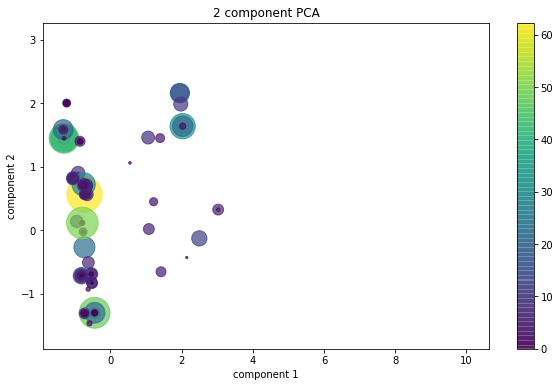

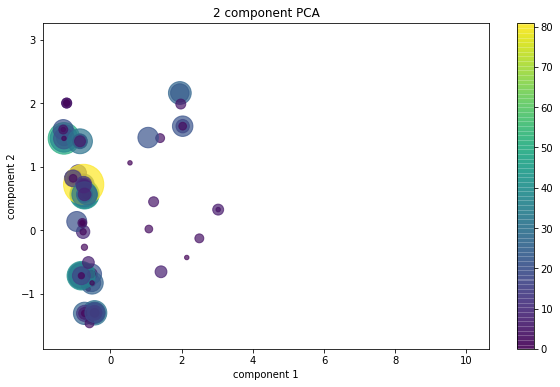

In [30]:
pca_scatter(df2, "percentage", "pca1.png", a=20)
pca_scatter(df2, "out_defects", "pca2.png", a=20)

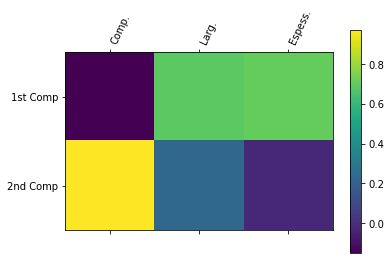

In [26]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(pca_selected_data)),pca_selected_data,rotation=65,ha='left')

plt.savefig("pca12.png")

plt.show()#

In [27]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

var #cumulative sum of variance explained with [n] features

array([43.9, 77.4])

### Other analysis

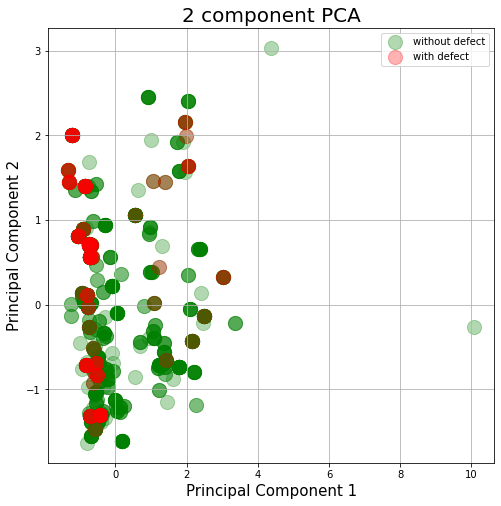

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.grid()

targets = ["without defect", "with defect"]
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['binned'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 200
               , alpha = 0.3)
ax.legend(targets)

plt.savefig("pca3.png")

In [289]:
selected_data = ["dim1", "dim2", "dim3", "dim1_1", "dim1_2", "Difference"]

X = pca_variables(selected_data, df)
principalDF, pca = pca_model(4, X)

principalDf shape:  (12809, 4)


In [308]:
def evaluate_model(pca):
    variance = pca.explained_variance_ratio_ #calculate variance ratios
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    print(var) #cumulative sum of variance explained with [n] features


def dim_correlation(pca, selected_data, filename):
    plt.matshow(pca.components_,cmap='viridis')
    plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(selected_data)),selected_data,rotation=65,ha='left')

    plt.savefig(filename)

    plt.show()#

### PCA for "Tipo de operação"


--- APLICAÇÃO DE VERNIZ ---

principalDf shape:  (4672, 2)
[46.4 79.3]


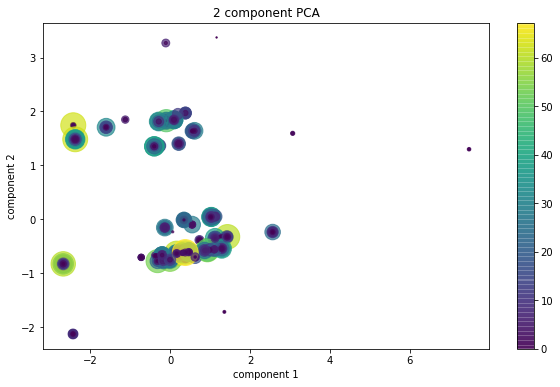

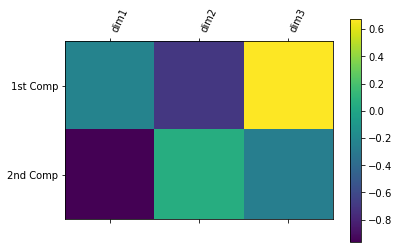


--- APLICAÇÃO DE ESMALTE BRANCO ---

principalDf shape:  (1030, 2)
[40.8 77.8]


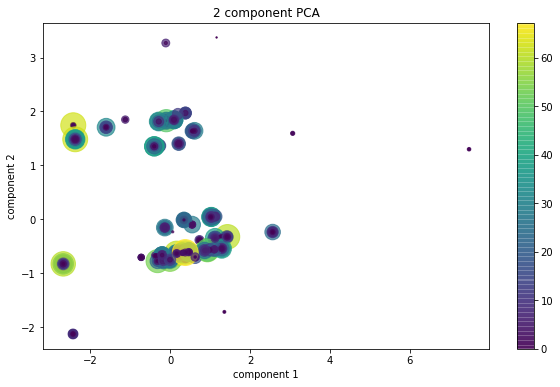

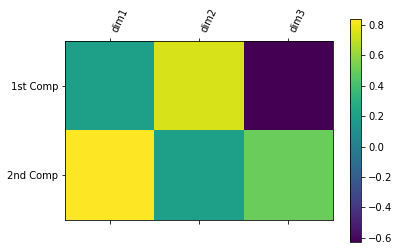


--- APLICAÇÃO DE TINTA DE IMPRESSÃO ---

principalDf shape:  (4258, 2)
[45. 78.]


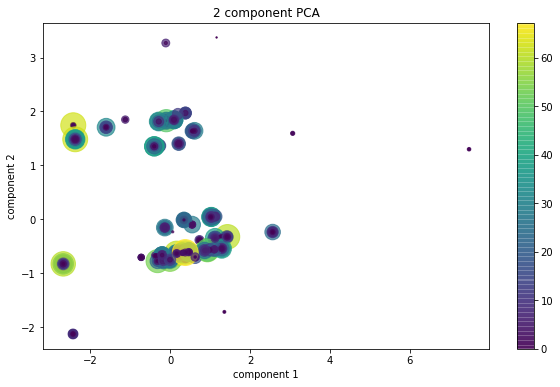

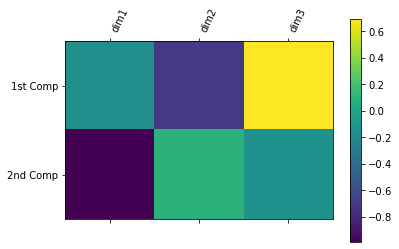


--- CORTE DE FOLHA ---

principalDf shape:  (1972, 2)
[46.1 78.6]


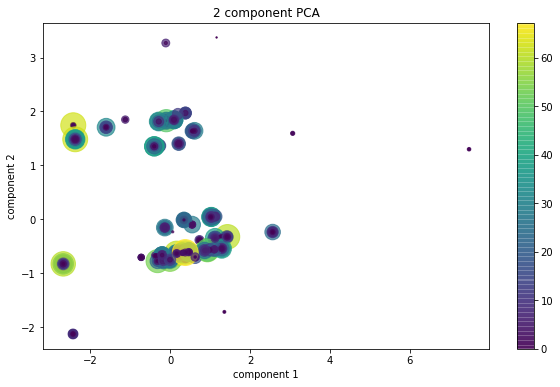

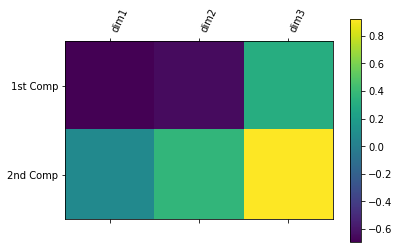


--- EMBALAMENTO ---

principalDf shape:  (877, 2)
[67.3 90. ]


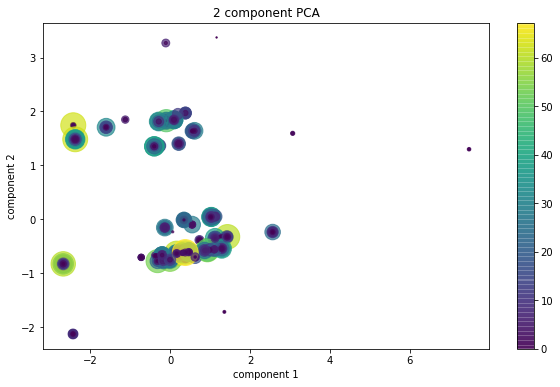

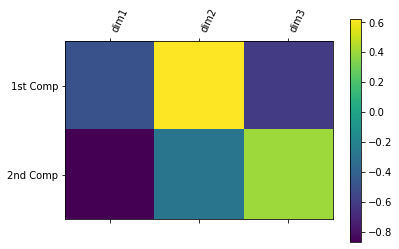

In [309]:
for n in df["Tipo de operação"].unique():
    
    print("\n---", n,"---\n")
    df3 = df[df["Tipo de operação"] == n]
    selected_data = ["dim1", "dim2", "dim3"]
    filename = str("pca_"+ n +".png")
    filename_dim = str("pca_dim_"+ n +".png")
    
    X = pca_variables(selected_data, df3)
    principalDF, pca = pca_model(2, X)
    
    evaluate_model(pca)
    pca_scatter(df2, "percentage", filename, a=10)
    dim_correlation(pca,selected_data,filename_dim)
    

### CART Regression Feature Importance
**Decision tree** for feature importance on a regression problem

The next examples are calculated using this [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) methods.

Feature: comp, Score: 22.59450
Feature: larg, Score: 7.14994
Feature: desc_LAB, Score: 12.92778
Feature: desc_PR, Score: 5.05020
Feature: desc_PR2, Score: 6.01376
Feature: car_CE, Score: 8.20032
Feature: car_COVG, Score: 6.02876


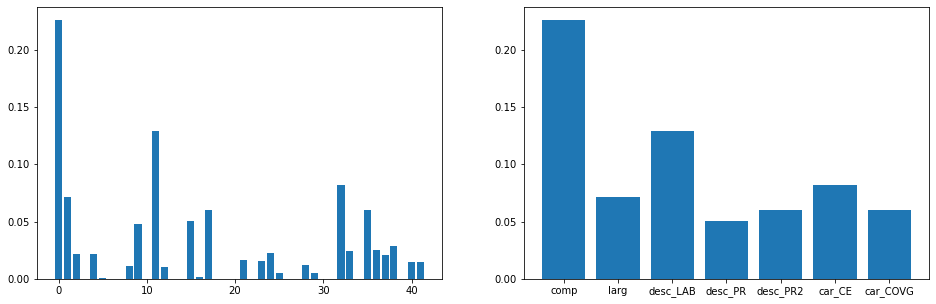

max: 22.594503418026544


In [138]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_enc, y_enc)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 0.5 * 10**(-1):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c  
        print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = pyplot.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
pyplot.show()
print("max:", max_v*100)

### CART Classification Feature Importance
**Decision tree** for feature importance on a classification problem

Feature: comp, Score: 20.24289
Feature: desc_BA, Score: 5.11718
Feature: desc_TO, Score: 6.80889
Feature: car_COVG, Score: 10.77797
Feature: car_NG, Score: 5.37131


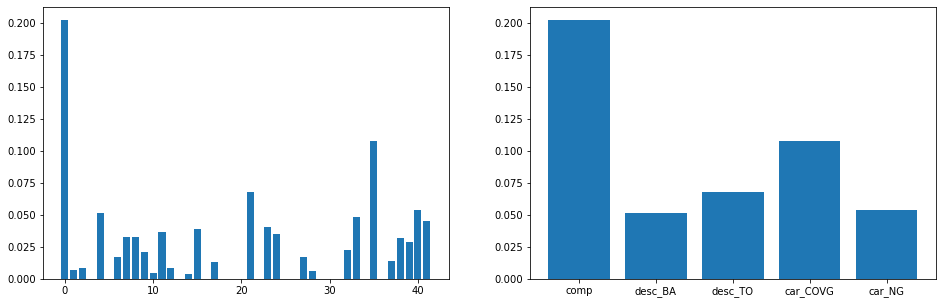

max: 20.24289161128305


In [121]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_enc, y_enc)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 0.5 * 10**(-1):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c  
        print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = pyplot.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
pyplot.show()
print("max:", max_v*100)

## Random Forest Feature Importance

### Random Forest Regression Feature Importance

**Random forest** for feature importance on a regression problem

Feature: comp, Score: 19.72435
Feature: desc_LAB, Score: 10.39484
Feature: car_ESVG, Score: 5.87738


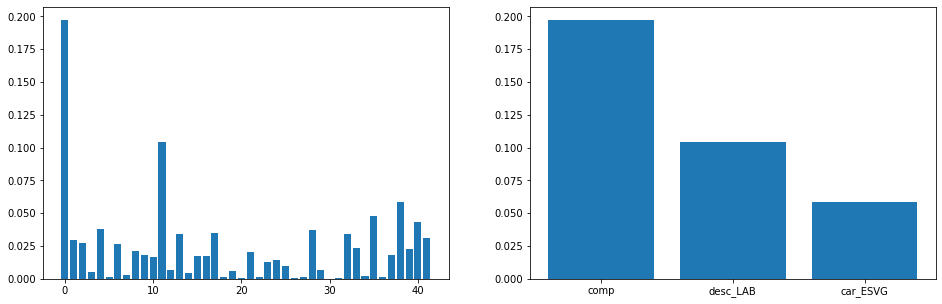

max: 19.72435082675601


In [99]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor(n_estimators=100)
# fit the model
model.fit(X_enc, y_enc)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 0.5 * 10**(-1):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c  
        print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = pyplot.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
pyplot.show()
print("max:", max_v*100)

### Random Forest Classification Feature Importance

**Random forest** for feature importance on a classification problem

Feature: comp, Score: 22.59823
Feature: car_CO/PL, Score: 6.13033
Feature: car_COVG, Score: 7.09888
Feature: car_NG, Score: 5.66340


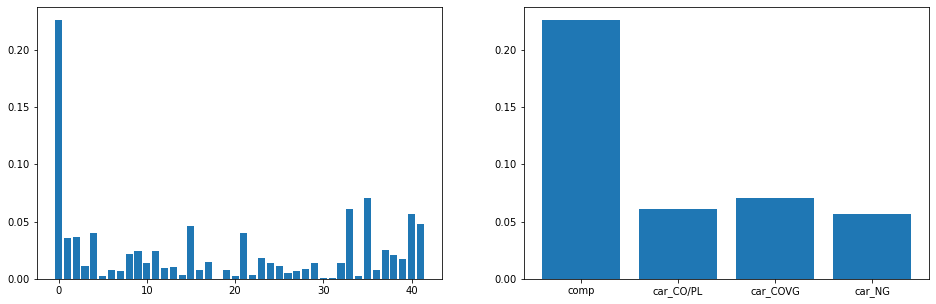

max: 22.598226803573194


In [95]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=100)
# fit the model
model.fit(X_enc, y_enc)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = []; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 0.5 * 10**(-1):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c  
        print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = pyplot.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
pyplot.show()
print("max:", max_v*100)

## Feature Selection 

In [139]:
# load dataset
data = df

# feature matrix
feature_selected = ind
X_fsel = X_enc[feature_selected]

display(X_fsel.head())

,comp,larg,desc_LAB,desc_PR,desc_PR2,car_CE,car_COVG
0,120.0,29.0,0,0,0,0,0
1,120.0,29.0,0,0,0,0,0
2,165.0,29.0,0,0,0,0,0
3,68.0,34.0,0,1,0,0,1
4,112.0,29.0,0,1,0,0,0


Feature: comp, Score: 26.74454
Feature: larg, Score: 20.61617
Feature: desc_LAB, Score: 37.27601
Feature: desc_PR, Score: 3.26756
Feature: desc_PR2, Score: 0.00000
Feature: car_CE, Score: 12.09572
Feature: car_COVG, Score: 0.00000


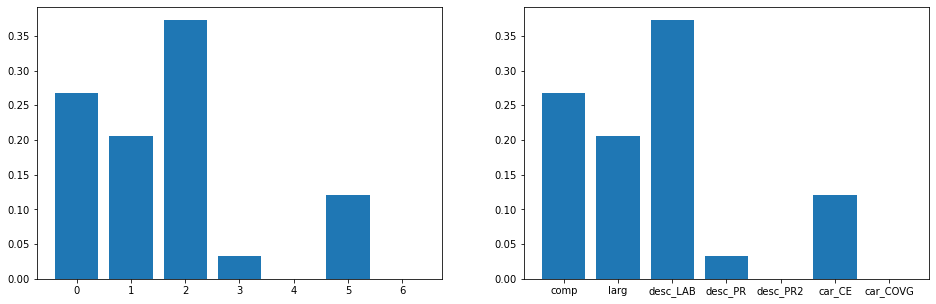

max: 37.27601160595344


In [144]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model_fsel = DecisionTreeRegressor(max_depth=3)
# fit the model
model_fsel.fit(X_fsel, y_enc)
# get importance
importance = model_fsel.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_fsel.columns, importance):
    ind.append(c) ; res.append(v)
    if v > max_v: max_v = v ; imax = c  
    print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = pyplot.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
pyplot.show()
print("max:", max_v*100)

### Display Tree

[Visualization of decision trees](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

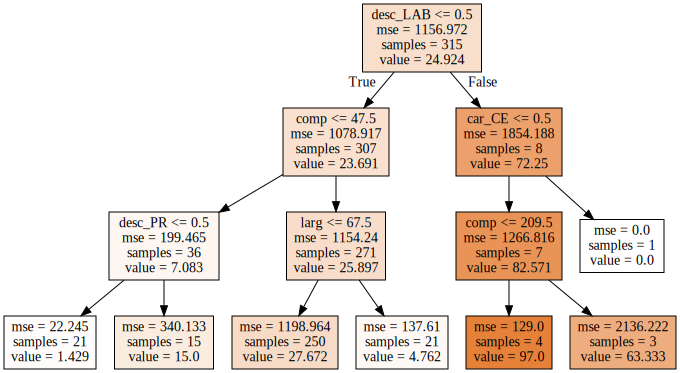

In [145]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_fsel.columns

graph = Source(tree.export_graphviz(model_fsel, out_file=None
   , feature_names=labels, filled = True, max_depth=4))

display(SVG(graph.pipe(format='svg')))